<a href="https://colab.research.google.com/github/lalo1905/CienciadeDatos_CIAL/blob/main/C%C3%A1ncer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# CONECTAMOS AL DRIVE
from google.colab import drive  # MONTAR MI DRIVE
drive.mount('/content/drive')  # MI DRIVE
groot = 'drive/MyDrive/Colab Notebooks'

# IMPORTAR LAS LIBRERÍAS NECESARIAS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# CARGAR EL DATASET DESDE EL ARCHIVO EN GOOGLE DRIVE
data_path = f'{groot}/wdbc.data'

# DEFINIR NOMBRES DE LAS COLUMNAS SEGÚN 'wdbc.names'
column_names = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se", "Compactness_se", "Concavity_se",
    "Concave points_se", "Symmetry_se", "Fractal_dimension_se", "Radius_worst", "Texture_worst", "Perimeter_worst",
    "Area_worst", "Smoothness_worst", "Compactness_worst", "Concavity_worst", "Concave points_worst",
    "Symmetry_worst", "Fractal_dimension_worst"
]

# CARGAR EL DATASET UTILIZANDO PANDAS
df = pd.read_csv(data_path, header=None, names=column_names)

# VERIFICAR LA CARGA DE DATOS
print("Primeras filas del dataset:")
print(df.head())

# PREPROCESAMIENTO DE DATOS
# ELIMINAR LA COLUMNA 'ID' YA QUE NO CONTRIBUYE AL MODELO
df.drop('ID', axis=1, inplace=True)

# CONVERTIR LA COLUMNA 'Diagnosis' A VALORES NUMÉRICOS (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# DIVIDIR LOS DATOS ENTRE ATRIBUTOS (X) Y ETIQUETAS (Y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# DIVIDIR EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA (80% ENTRENAMIENTO, 20% PRUEBA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ESCALAR LOS DATOS UTILIZANDO StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ENTRENAR UN MODELO SVM CON UN KERNEL LINEAL
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# HACER PREDICCIONES SOBRE EL CONJUNTO DE PRUEBA
y_pred = model.predict(X_test_scaled)

# MOSTRAR EL INFORME DE CLASIFICACIÓN
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# MOSTRAR LA EXACTITUD DEL MODELO
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
         ID Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414        

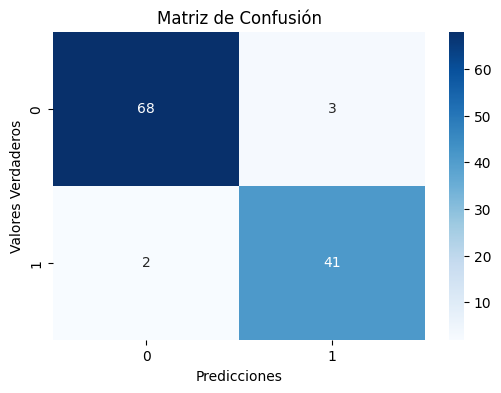

In [ ]:

# IMPORTAR LAS LIBRERÍAS NECESARIAS PARA LAS GRÁFICAS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# GRAFICAR LA MATRIZ DE CONFUSIÓN DE LAS PREDICCIONES
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valores Verdaderos')
plt.xlabel('Predicciones')
plt.show()